# Machine Learning / Data Science Pipeline

## Preparing Your Data
Data can come in many forms, images, videos, audio, documents and etc. In this step you are to convert your data into a more ML friendly representation. Your dataset should fit in the ML model. This is the step where you identify which measurements from are your input, which measurements are your response (if any) and which measurements correspond to the features. If your data already comes in a format that would fit into the ML model then your good to go. If your data comes in more interesting formats like images, videos, audio or etc. then you have some work to do.

### Example: Image Data
There are a lot of image processing libraries in python available like [scikit-image](http://scikit-image.org "scikit-image homepage") or [opencv](http://opencv-python-tutroals.readthedocs.io/en/latest/index.html "opencv documentation"). Some libraries like [scipy](https://www.scipy.org/ "scipy homepage") have image processing capabilities as well

In [1]:
import skimage
import scipy.misc

Data can be represented into features using many ways. The purest representation of an image is its RGB matrix pixel representation. In the following snippets of code, we convert a png image into a matrix of pixel values. When the image is read using `scipy.misc.imread()` the ouput is a 3 dimensional numpy array. The first two dimensions refer to the pixels location heightwise and lengthwise. The third dimension refers to the RGB values of the pixel.

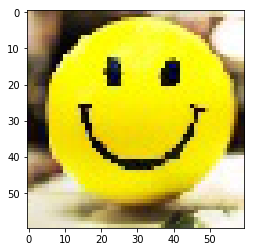

In [2]:
import matplotlib.pyplot as plt
smile = scipy.misc.imread('smile.jpg')
plt.imshow(smile)
plt.show()

In [3]:
smile.shape

(60, 60, 3)

It is now possible to convert the pixel matrix into an ML dataset. The features of the image can correspond to each individual pixels in the image. Using the example above, a 60x60 image can be represented into an observation with (60)(60)(3) features.

Using this method of representation makes learning slow since the number of features for high resolution images become too large. This is why advanced image representation techniques employ the use of feature detectors. These feature detectors are able to extract fewer but more meaningful features like, edges, corners, blobs and etc. Feature detection in images are available in image processing libraries like `scikit-image`.

In the following code snippets, edges and corners are detected using the `feature.canny` and `feature.corner_fast` feature detections function in the library `scikit-image`. The image is converted to greyscale first and then the edges of the picture are extracted. On the first graph, pixels colored white are pixels where edges are detected. On the second graph pixels colored white are pixels where corners are detected.

Instead of keeping track of each pixel's RGB value, you can just create observations based on extracted features.

In [4]:
from skimage import color
from skimage import io

greysmile = color.rgb2gray(smile)
greysmile.shape

(60, 60)

In [5]:
from skimage import feature
edges=feature.canny(greysmile)
corners=feature.corner_harris(greysmile)

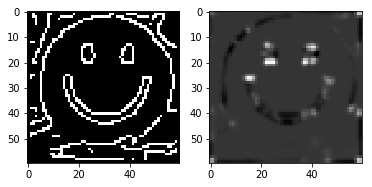

In [6]:
plt.subplot(121)
plt.imshow(edges, cmap=plt.cm.gray)
plt.subplot(122)
plt.imshow(corners, cmap=plt.cm.gray)
plt.show()

## Exploratory Data Analysis
Before you do anything, get a feel for your data first. Check how your data looks like. What are the complexities of this dataset? Are there any roadblocks? Is this data ready for your ML algorithms?

### From Text to DataFrames
After preparing your data, the next step for you is to store this data into a manageable container. Python has a lot of libraries that are excellent containers for data like [numpy](http://www.numpy.org/ "numpy homepage") and [pandas](http://pandas.pydata.org/ "pandas homepage"). For example, given the iris dataset in a comma separated text format where each line corresponds to one observation: *x1,x2,x3,x4,y* the first four values correspond to the features and the last value corresponds to the response variable.

In [7]:
import codecs
f = codecs.open('iris.txt', encoding='utf-8')
for line in f:
    print(line,end='')

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris

#### Numpy

Numpy is an n-dimensional container which has wide range capabilities like matrix and scalar operations. Numpy works well with pandas and scikit-learn. The drawback with this container is that it can't take non-numerical values

In [8]:
import numpy as np

X=np.matrix(np.loadtxt(open("iris.txt"),delimiter=",",usecols=(0,1,2,3)))
X

matrix([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 4.8,  3.4,  1.6,  0.2],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.3],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.4,  3.4,  1.7,  0.2],
        [ 5.1,  3.7,  1.5,  0.4],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5.1,  3.3,  1.7,  0.5],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5. ,  3.4,  1.6,  0.4],
        [ 5.2,  3.5,  1.5,  0.2],
        [ 5.2,  3.4,  1.4,  0.2],
        [ 4.7,

#### Tensor
Tensors are the central unit of data used in tensorflow. It has the similar capabilities as numpy arrays.

In [9]:
import tensorflow as tf

Xtensor=tf.convert_to_tensor(X)
Xtensor

<tf.Tensor 'Const:0' shape=(150, 4) dtype=float64>

#### Pandas
Pandas library is a 2 dimensional dataframe container. It is built on top of Numpy arrays. Pandas are able to display data in tabular form. It is also capable of relational operations like, join, union, difference and etc. Pandas dataframes are one of best ways to present data

In [10]:
import pandas

dataset=pandas.read_csv("iris.txt",names=["sepal length","sepal width","petal length","petal width","species(y)"],index_col=False)
dataset

,sepal length,sepal width,petal length,petal width,species(y)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


pandas is capable of interesting data selection methods. In ths following snippet of code I print only the rows where `species(y)=='Iris-setosa'`. And in the next snippet I print only the `'sepal length'` column of Iris-setosa flowers.

In [11]:
dataset.loc[dataset['species(y)']=='Iris-setosa']

,sepal length,sepal width,petal length,petal width,species(y)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [12]:
(dataset.loc[dataset['species(y)']=='Iris-setosa'])['sepal length']

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal length, dtype: float64

## Visualization
It's good practice to visualize your data as you're handling it. Python has a plethora of visualization libraries that will suit almost any need. One of the original and widely used visulaization tools is [matplotlib](https://matplotlib.org/ "matplotlib homepage"). [seaborn](https://seaborn.pydata.org/ "seaborn homepage") is built on top of matplotlib and offers aesthetic tweaks to visualizations. [ggplot](http://ggplot.yhathq.com/ "ggplot homepage") which is tightly integrated with pandas. Some visualization tools are good for specific uses like [geoplotlib](https://github.com/andrea-cuttone/geoplotlib "geoplotlib github page") for geographical charts and [missingno](https://github.com/ResidentMario/missingno "missingno github page") for missing-data visualizations

#### Scatter Plots
Scatter plots are great for visualizing your data's trends, clustering, variance and etc. In this example I used matplotlib to show the relationship between petal length, petal width and the species.

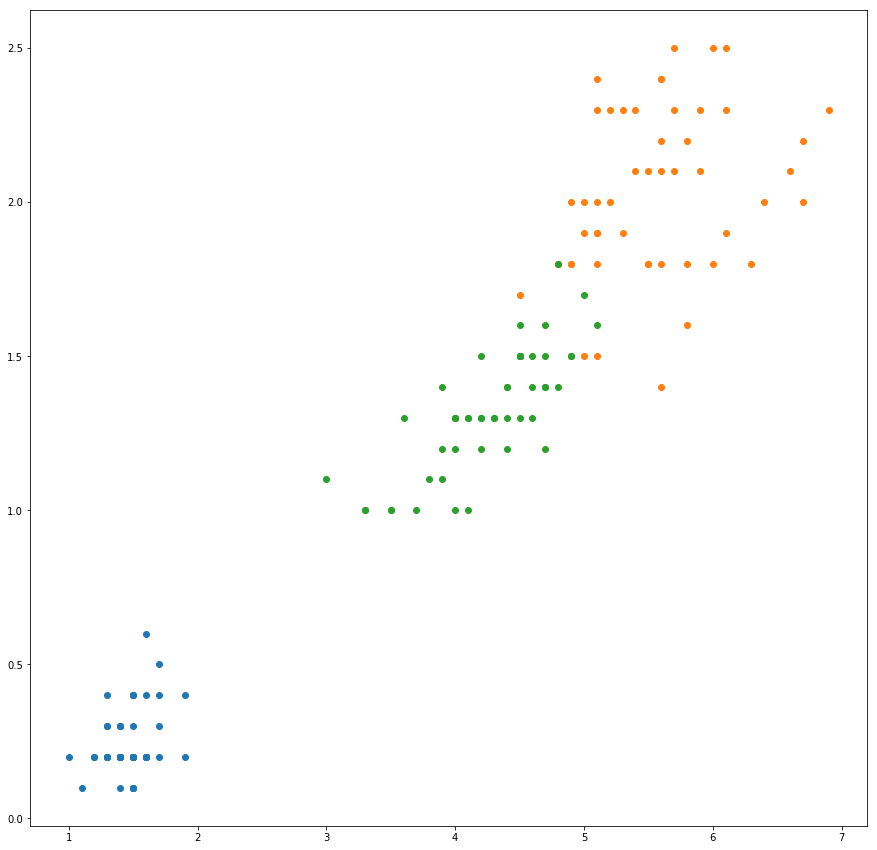

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

plt.scatter(dataset.loc[dataset['species(y)']=='Iris-setosa']['petal length'].values,dataset.loc[dataset['species(y)']=='Iris-setosa']['petal width'].values)
plt.scatter(dataset.loc[dataset['species(y)']=='Iris-virginica']['petal length'].values,dataset.loc[dataset['species(y)']=='Iris-virginica']['petal width'].values)
plt.scatter(dataset.loc[dataset['species(y)']=='Iris-versicolor']['petal length'].values,dataset.loc[dataset['species(y)']=='Iris-versicolor']['petal width'].values)

plt.show()

The above scatterplot is good visualization of the data. But this is just comparing two features, sepal length and sepal width. A better visualization would be a comparison of all four features. Visualizaing in 4 dimensions is challenging, impossible even. An alternative for a 4d plot would be the following plot, a scatterplot matrix of all possible pairings of dimensions

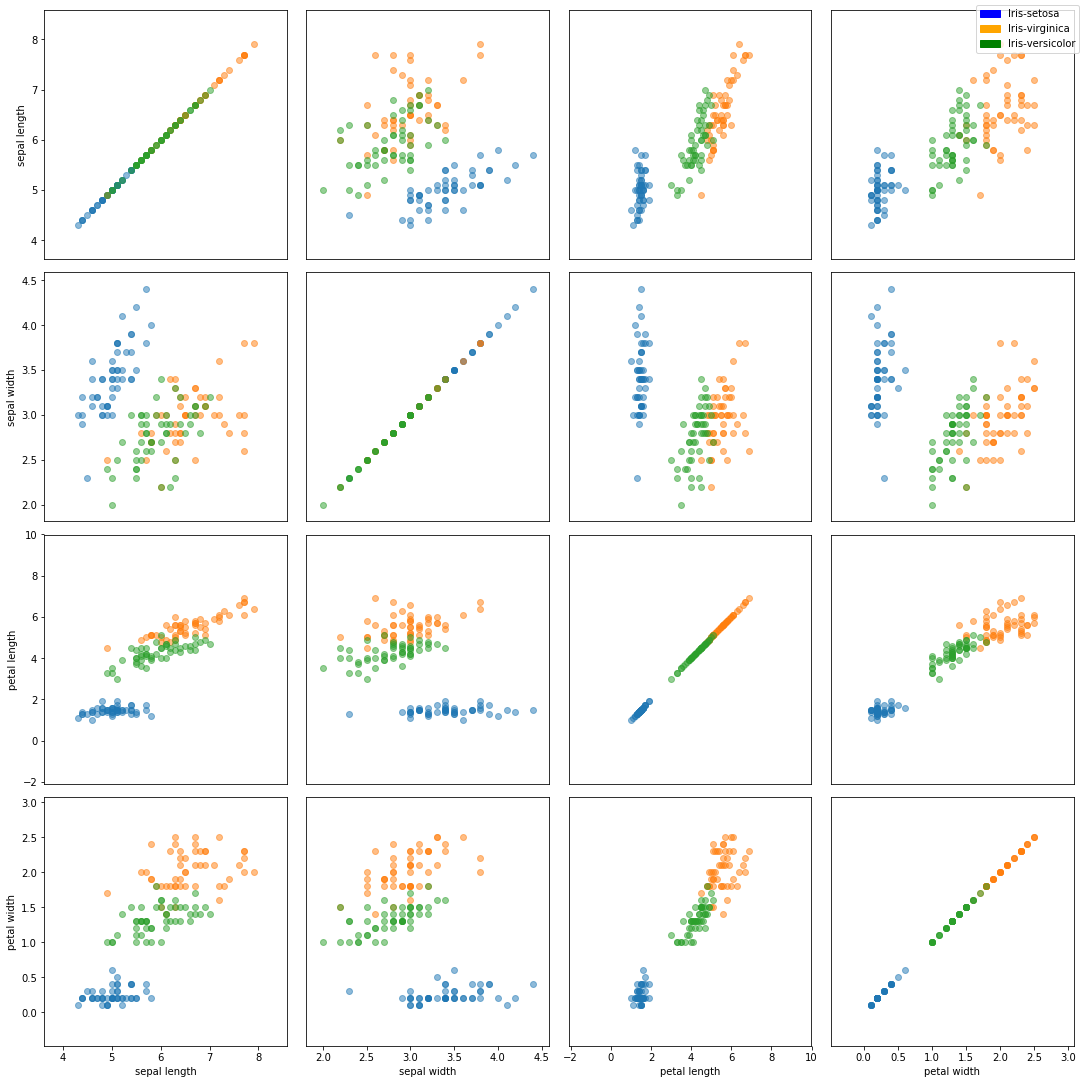

In [14]:
import matplotlib.patches as mpatches
i=1
for feature1 in dataset.columns.values[:4]:
    for feature2 in dataset.columns.values[:4]:
        plt.subplot(4,4,i)
        if(not feature2==dataset.columns.values[0]):
            plt.yticks([])
        else:
            plt.ylabel(feature1)
        if(not feature1==dataset.columns.values[-2]):
            plt.xticks([])
        else:
            plt.xlabel(feature2)
        
        plt.xlim(np.amin(dataset[feature2].values)-np.var(dataset[feature2].values),np.amax(dataset[feature2].values+np.var(dataset[feature2].values)))
        plt.ylim(np.amin(dataset[feature1].values)-np.var(dataset[feature1].values),np.amax(dataset[feature1].values+np.var(dataset[feature1].values)))
        
        for y_class in ['Iris-setosa','Iris-virginica','Iris-versicolor']:
            plt.scatter(dataset.loc[dataset['species(y)']==y_class][feature2].values,dataset.loc[dataset['species(y)']==y_class][feature1].values,label=y_class,alpha=0.5)
        i=i+1
plt.tight_layout(pad=0.5)
blue_patch=mpatches.Patch(color='blue')
orange_patch=mpatches.Patch(color='orange')
green_patch=mpatches.Patch(color='green')
plt.figlegend((blue_patch,orange_patch,green_patch),('Iris-setosa','Iris-virginica','Iris-versicolor'),'upper right')
plt.show()


#### Histogram

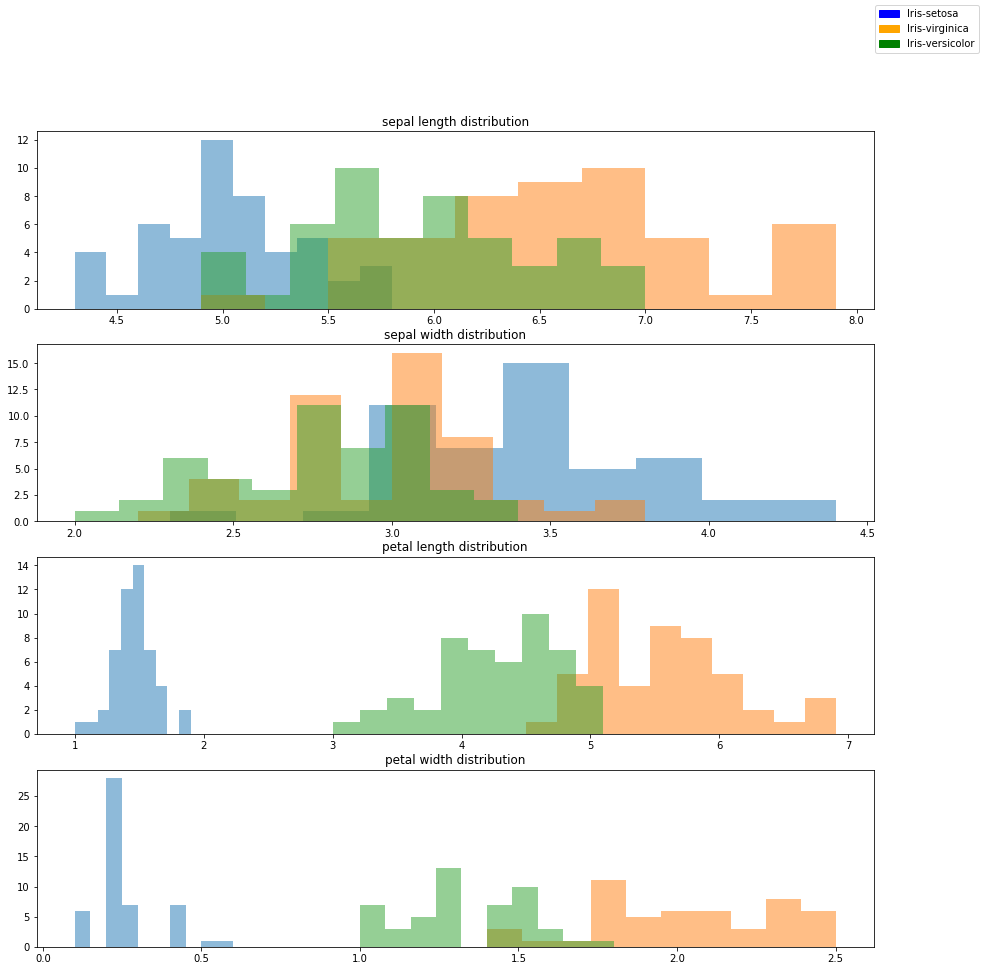

In [15]:
rcParams['figure.figsize'] = 15, 15
i=1
for feature in dataset.columns.values[:4]:
    plt.subplot(4,1,i)
    plt.title(feature+" distribution")
    for y_class in ['Iris-setosa','Iris-virginica','Iris-versicolor']:
        plt.hist(dataset.loc[dataset['species(y)']==y_class][feature].values,bins=10,alpha=0.5,label=y_class)
    i=i+1
plt.figlegend((blue_patch,orange_patch,green_patch),('Iris-setosa','Iris-virginica','Iris-versicolor'),'upper right')
plt.show()